In [1]:
import torch
import torch.nn.functional as F

In [2]:
# Load the entire collection of K caches from all timesteps
all_k_caches = torch.load("all_k_caches.pt")

/tmp/ipykernel_830551/2592285375.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  all_k_caches = torch.load("all_k_caches.pt")


In [3]:
# Define which steps and block to compare
step_t = 5
step_t_plus_1 = 6
block_key = 'double_0'

In [4]:
# 2. Get the two K tensors
k_tensor_t = all_k_caches[step_t][block_key]
k_tensor_t_plus_1 = all_k_caches[step_t_plus_1][block_key]

# # Ensure tensors are on the same device (e.g., CPU) for comparison
# k_tensor_t = k_tensor_t.to('cpu')
# k_tensor_t_plus_1 = k_tensor_t_plus_1.to('cpu')

In [5]:
# 3. Flatten the tensors to treat them as 1D vectors
k_tensor_t_flat = k_tensor_t.flatten()
k_tensor_t_plus_1_flat = k_tensor_t_plus_1.flatten()

In [6]:
# 4. Calculate cosine similarity
# We add unsqueeze(0) because the function expects a batch dimension
similarity = F.cosine_similarity(k_tensor_t_flat.unsqueeze(0), k_tensor_t_plus_1_flat.unsqueeze(0))

# 5. Print the result
print(f"Cosine similarity for block '{block_key}' between step {step_t} and {step_t_plus_1}: {similarity.item():.4f}")

Cosine similarity for block 'double_0' between step 5 and 6: 0.9961


In [7]:
step_t = 5
step_t_plus_1 = 6

# Get all the block keys from one of the dictionaries (e.g., the first one)
block_keys = all_k_caches[0].keys()

print(f"\n--- Comparing Timestep {step_t} and {step_t_plus_1} ---\n")

# Loop through all block keys
for key in block_keys:
    # Get the two K tensors
    k_tensor_t = all_k_caches[step_t][key]
    k_tensor_t_plus_1 = all_k_caches[step_t_plus_1][key]

    # Flatten the tensors
    k_tensor_t_flat = k_tensor_t.flatten()
    k_tensor_t_plus_1_flat = k_tensor_t_plus_1.flatten()

    # Calculate cosine similarity
    similarity = F.cosine_similarity(k_tensor_t_flat.unsqueeze(0), k_tensor_t_plus_1_flat.unsqueeze(0))

    # Print the result for the current block
    print(f"Block '{key}': Similarity = {similarity.item():.4f}")


--- Comparing Timestep 5 and 6 ---

Block 'double_0': Similarity = 0.9961
Block 'double_1': Similarity = 0.9961
Block 'double_2': Similarity = 1.0000
Block 'double_3': Similarity = 0.9922
Block 'double_4': Similarity = 1.0000
Block 'double_5': Similarity = 0.9922
Block 'double_6': Similarity = 0.9922
Block 'double_7': Similarity = 0.9922
Block 'double_8': Similarity = 0.9883
Block 'double_9': Similarity = 0.9883
Block 'double_10': Similarity = 0.9883
Block 'double_11': Similarity = 0.9844
Block 'double_12': Similarity = 0.9805
Block 'double_13': Similarity = 0.9805
Block 'double_14': Similarity = 0.9766
Block 'double_15': Similarity = 0.9727
Block 'double_16': Similarity = 0.9766
Block 'double_17': Similarity = 0.9766
Block 'double_18': Similarity = 0.9727
Block 'double_19': Similarity = 0.9727
Block 'single_0': Similarity = 0.9688
Block 'single_1': Similarity = 0.9609
Block 'single_2': Similarity = 0.9688
Block 'single_3': Similarity = 0.9805
Block 'single_4': Similarity = 0.9805
Blo

In [8]:
step_t = 4
step_t_plus_1 = 9

# Get all the block keys from one of the dictionaries (e.g., the first one)
block_keys = all_k_caches[0].keys()

print(f"\n--- Comparing Timestep {step_t} and {step_t_plus_1} ---\n")

# Loop through all block keys
for key in block_keys:
    # Get the two K tensors
    k_tensor_t = all_k_caches[step_t][key]
    k_tensor_t_plus_1 = all_k_caches[step_t_plus_1][key]

    # Flatten the tensors
    k_tensor_t_flat = k_tensor_t.flatten()
    k_tensor_t_plus_1_flat = k_tensor_t_plus_1.flatten()

    # Calculate cosine similarity
    similarity = F.cosine_similarity(k_tensor_t_flat.unsqueeze(0), k_tensor_t_plus_1_flat.unsqueeze(0))

    # Print the result for the current block
    print(f"Block '{key}': Similarity = {similarity.item():.4f}")


--- Comparing Timestep 4 and 9 ---

Block 'double_0': Similarity = 0.9883
Block 'double_1': Similarity = 0.9766
Block 'double_2': Similarity = 0.9648
Block 'double_3': Similarity = 0.9141
Block 'double_4': Similarity = 0.9414
Block 'double_5': Similarity = 0.9023
Block 'double_6': Similarity = 0.9062
Block 'double_7': Similarity = 0.9141
Block 'double_8': Similarity = 0.8945
Block 'double_9': Similarity = 0.9062
Block 'double_10': Similarity = 0.9062
Block 'double_11': Similarity = 0.8672
Block 'double_12': Similarity = 0.8516
Block 'double_13': Similarity = 0.8516
Block 'double_14': Similarity = 0.8516
Block 'double_15': Similarity = 0.8516
Block 'double_16': Similarity = 0.8477
Block 'double_17': Similarity = 0.8828
Block 'double_18': Similarity = 0.8516
Block 'double_19': Similarity = 0.8594
Block 'single_0': Similarity = 0.8438
Block 'single_1': Similarity = 0.8164
Block 'single_2': Similarity = 0.8516
Block 'single_3': Similarity = 0.8828
Block 'single_4': Similarity = 0.9062
Blo

In [9]:
# Creating a heatmap of similarities across all blocks between two timesteps
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_similarity_heatmap(step_t, step_t_plus_1):
    # Heatmap data
    heatmap_data = []
    block_labels = []
    for key in block_keys:
        k_tensor_t = all_k_caches[step_t][key]
        k_tensor_t_plus_1 = all_k_caches[step_t_plus_1][key]

        k_tensor_t_flat = k_tensor_t.flatten()
        k_tensor_t_plus_1_flat = k_tensor_t_plus_1.flatten()

        similarity = F.cosine_similarity(k_tensor_t_flat.unsqueeze(0), k_tensor_t_plus_1_flat.unsqueeze(0))
        
        heatmap_data.append(similarity.item())
        block_labels.append(key)
        
    heatmap_data = np.array(heatmap_data).reshape(1, -1)  # Reshape for heatmap

    # Create the heatmap
    plt.figure(figsize=(15, 1))
    sns.heatmap(heatmap_data, xticklabels=block_labels, yticklabels=["Similarity"], cmap="coolwarm", cbar=True)
    plt.title(f"Cosine Similarity Heatmap between Timestep {step_t} and {step_t_plus_1}")
    plt.xlabel("Blocks")
    # plt.ylabel("Similarity")
    plt.show()



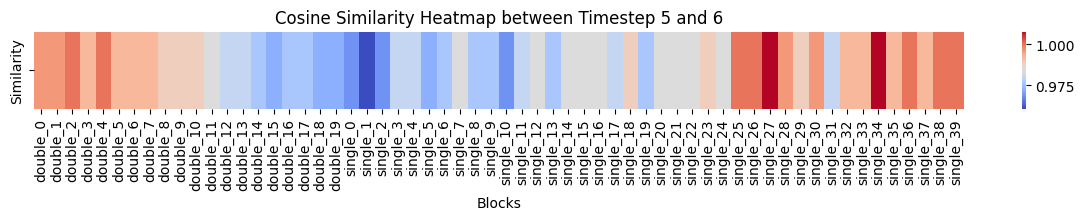

In [10]:
plot_similarity_heatmap(5, 6)

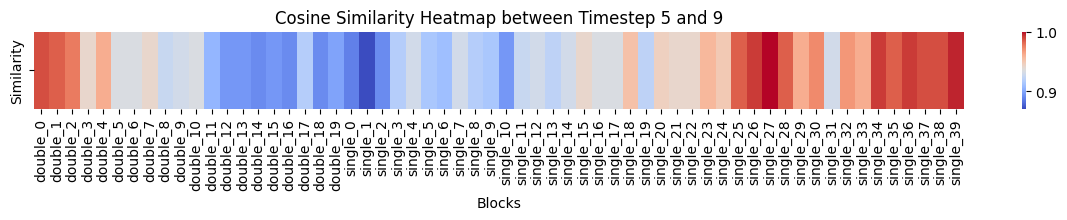

In [11]:
plot_similarity_heatmap(5, 9)

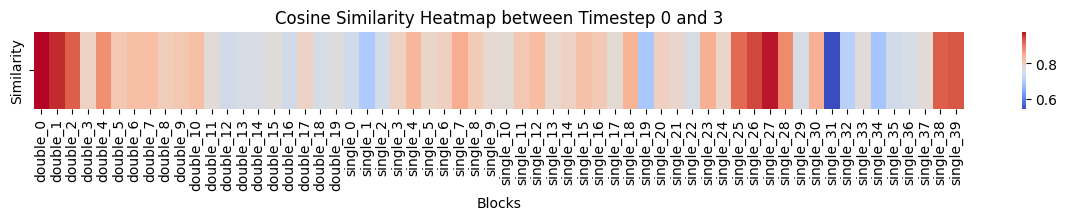

In [12]:
plot_similarity_heatmap(0, 3)

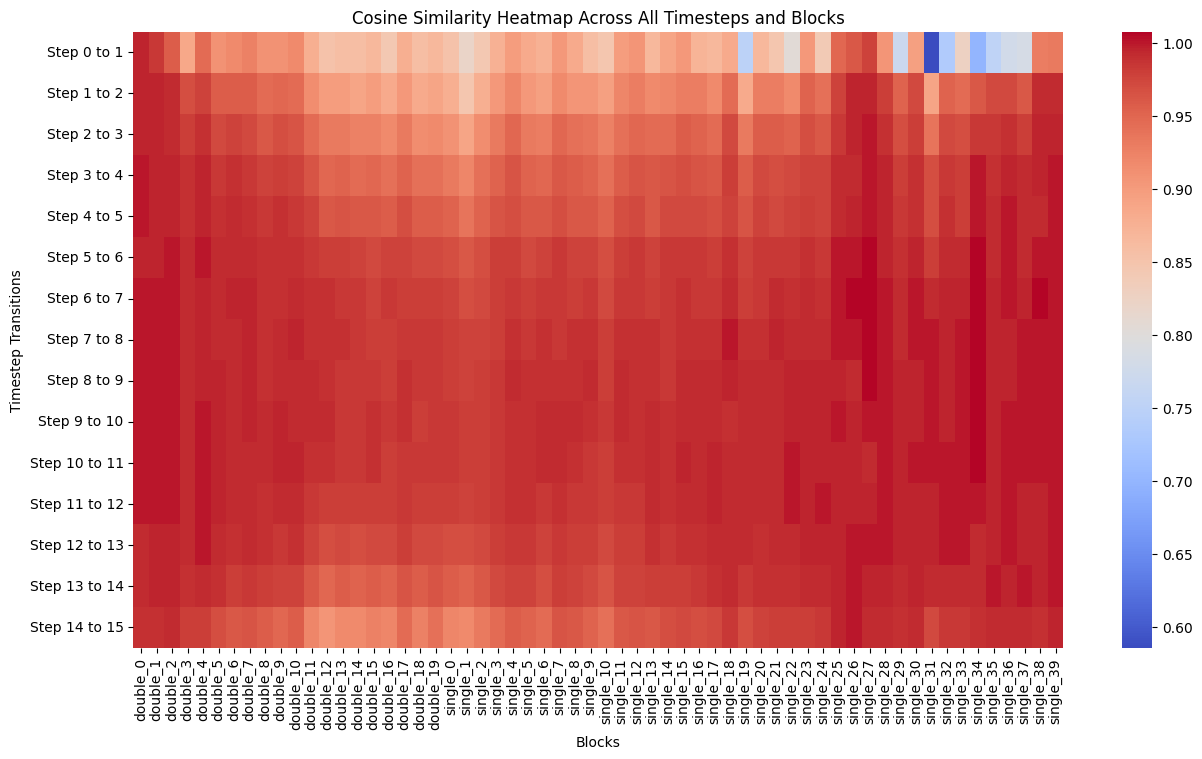

In [13]:
# Building a 2D heatmap to compare across all the timesteps
def plot_full_similarity_heatmap():
    num_steps = len(all_k_caches)
    num_blocks = len(block_keys)
    
    # Initialize a 2D array to hold similarity values
    full_heatmap_data = np.zeros((num_steps - 1, num_blocks))
    
    for i in range(num_steps - 1):
        for j, key in enumerate(block_keys):
            k_tensor_t = all_k_caches[i][key]
            k_tensor_t_plus_1 = all_k_caches[i + 1][key]

            k_tensor_t_flat = k_tensor_t.flatten()
            k_tensor_t_plus_1_flat = k_tensor_t_plus_1.flatten()

            similarity = F.cosine_similarity(k_tensor_t_flat.unsqueeze(0), k_tensor_t_plus_1_flat.unsqueeze(0))
            full_heatmap_data[i, j] = similarity.item()
    
    plt.figure(figsize=(15, 8))
    sns.heatmap(full_heatmap_data, xticklabels=block_keys, yticklabels=[f"Step {i} to {i+1}" for i in range(num_steps - 1)], cmap="coolwarm", cbar=True)
    plt.title("Cosine Similarity Heatmap Across All Timesteps and Blocks")
    plt.xlabel("Blocks")
    plt.ylabel("Timestep Transitions")
    plt.show()

plot_full_similarity_heatmap()

The Horizontal Pattern (Across Blocks): Just as we saw before, in almost every row, the similarity is highest for the first few double blocks and the last ~15 single blocks. There's a consistent "dip" in similarity in the middle blocks.

## For each step

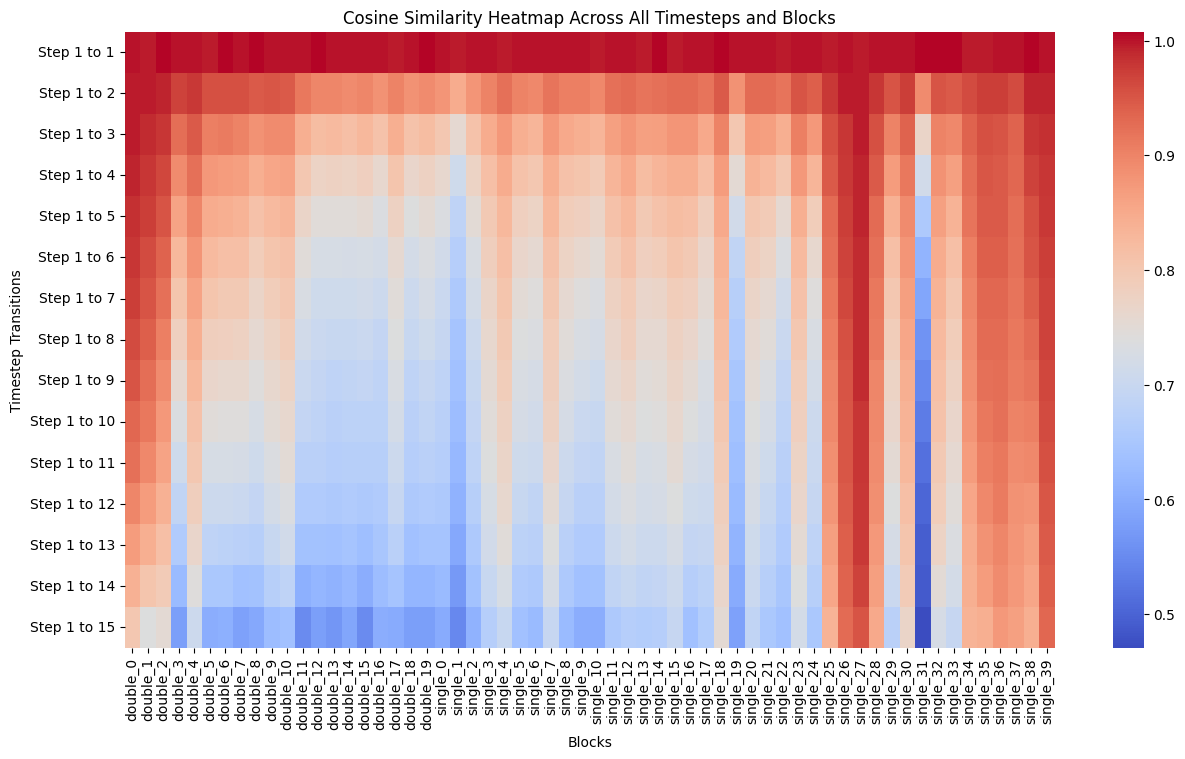

[[1.         0.99609375 1.0078125  1.         1.         0.99609375
  1.0078125  1.         1.0078125  1.         1.         1.
  1.0078125  1.         1.         1.         1.         0.99609375
  1.         1.0078125  1.         0.99609375 1.         1.
  0.99609375 1.         1.         1.         1.         1.
  0.99609375 1.         1.         0.99609375 1.0078125  0.99609375
  1.         1.         1.0078125  1.         1.         1.
  0.99609375 1.         1.         0.99609375 1.         0.99609375
  1.         1.         1.         1.0078125  1.0078125  1.0078125
  0.99609375 0.99609375 1.         1.         1.0078125  1.        ]
 [0.99609375 0.99609375 0.9921875  0.96875    0.9765625  0.95703125
  0.95703125 0.95703125 0.9453125  0.94921875 0.9453125  0.9140625
  0.8984375  0.8984375  0.890625   0.8984375  0.8828125  0.90234375
  0.8828125  0.890625   0.87890625 0.84765625 0.87890625 0.90234375
  0.921875   0.90234375 0.89453125 0.91796875 0.90625    0.90625
  0.89453125 0.9

In [14]:
# Building a 2D heatmap to compare across all the timesteps
def plot_full_similarity_heatmap(step):
    num_steps = len(all_k_caches)
    num_blocks = len(block_keys)
    
    # Initialize a 2D array to hold similarity values
    full_heatmap_data = np.zeros((num_steps - 1, num_blocks))
    
    for i in range(num_steps - 1):
        for j, key in enumerate(block_keys):
            k_tensor_t = all_k_caches[step][key]
            k_tensor_t_plus_1 = all_k_caches[i + 1][key]

            k_tensor_t_flat = k_tensor_t.flatten()
            k_tensor_t_plus_1_flat = k_tensor_t_plus_1.flatten()

            similarity = F.cosine_similarity(k_tensor_t_flat.unsqueeze(0), k_tensor_t_plus_1_flat.unsqueeze(0))
            full_heatmap_data[i, j] = similarity.item()
    
    plt.figure(figsize=(15, 8))
    sns.heatmap(full_heatmap_data, xticklabels=block_keys, yticklabels=[f"Step {step} to {i+1}" for i in range(num_steps - 1)], cmap="coolwarm", cbar=True)
    plt.title("Cosine Similarity Heatmap Across All Timesteps and Blocks")
    plt.xlabel("Blocks")
    plt.ylabel("Timestep Transitions")
    plt.show()

    return full_heatmap_data

data = plot_full_similarity_heatmap(1)
print(data)

In [15]:
#first column of data
print(data[:, 0])

# Printing the range of steps for which similarity is above a certain threshold for a specific block
threshold = 0.95
block_key = 'double_0'
last_step_above_threshold = -1
# data = plot_full_similarity_heatmap(1)
for i in range(data.shape[0]):
    # if data[i, 0] >= threshold:
    #     range_above_threshold.append(i)
    while data[i, 0] >= threshold:
        last_step_above_threshold = i
        break
print(f"Last step where similarity for block '{block_key}' is above {threshold}: {last_step_above_threshold}")


# Doing the same for all blocks by iterating over columns
threshold = 0.95
block_keys = list(block_keys)  # Convert to list for indexing
last_steps_above_threshold = {}
for j in range(data.shape[1]):
    block_key = block_keys[j]
    last_step_above_threshold = -1
    for i in range(data.shape[0]):
        while data[i, j] >= threshold:
            last_step_above_threshold = i
            break
    last_steps_above_threshold[block_key] = last_step_above_threshold
print(f"Last steps where similarity is above {threshold} for each block:")
for block, step in last_steps_above_threshold.items():
    print(f"Block '{block}': Last Step = {step}")


[1.         0.99609375 0.99609375 0.9921875  0.984375   0.98046875
 0.97265625 0.9609375  0.953125   0.93359375 0.921875   0.8984375
 0.87109375 0.83984375 0.80078125]
Last step where similarity for block 'double_0' is above 0.95: 8
Last steps where similarity is above 0.95 for each block:
Block 'double_0': Last Step = 8
Block 'double_1': Last Step = 6
Block 'double_2': Last Step = 4
Block 'double_3': Last Step = 1
Block 'double_4': Last Step = 1
Block 'double_5': Last Step = 1
Block 'double_6': Last Step = 1
Block 'double_7': Last Step = 1
Block 'double_8': Last Step = 0
Block 'double_9': Last Step = 0
Block 'double_10': Last Step = 0
Block 'double_11': Last Step = 0
Block 'double_12': Last Step = 0
Block 'double_13': Last Step = 0
Block 'double_14': Last Step = 0
Block 'double_15': Last Step = 0
Block 'double_16': Last Step = 0
Block 'double_17': Last Step = 0
Block 'double_18': Last Step = 0
Block 'double_19': Last Step = 0
Block 'single_0': Last Step = 0
Block 'single_1': Last Step

In [16]:
# Doing the same for all the timesteps by first constructing full_heatmap_data without plotting
def get_full_similarity_data(threshold):
    num_steps = len(all_k_caches)
    num_blocks = len(block_keys)

    # Initialize a dictionary to hold last steps above threshold for each block of each step
    all_last_steps_above_threshold = {}
    
    # Initialize a 2D array to hold similarity values
    full_heatmap_data = np.zeros((num_steps - 1, num_blocks))
    
    for step in range(num_steps):
        for i in range(num_steps - 1):
            for j, key in enumerate(block_keys):
                k_tensor_t = all_k_caches[step][key]
                k_tensor_t_plus_1 = all_k_caches[i + 1][key]

                k_tensor_t_flat = k_tensor_t.flatten()
                k_tensor_t_plus_1_flat = k_tensor_t_plus_1.flatten()

                similarity = F.cosine_similarity(
                    k_tensor_t_flat.unsqueeze(0), 
                    k_tensor_t_plus_1_flat.unsqueeze(0)
                )
                full_heatmap_data[i, j] = similarity.item()

        for j in range(full_heatmap_data.shape[1]):
            block_key = block_keys[j]
            last_step_above_threshold = -1
            for i in range(full_heatmap_data.shape[0]):
                while full_heatmap_data[i, j] >= threshold:
                    last_step_above_threshold = i
                    break
            if step not in all_last_steps_above_threshold:
                all_last_steps_above_threshold[step] = {}
            all_last_steps_above_threshold[step][block_key] = last_step_above_threshold


    return all_last_steps_above_threshold

In [17]:
all_last_steps_above_threshold = get_full_similarity_data(0.97)

In [18]:
all_last_steps_above_threshold[0]

{'double_0': 3,
 'double_1': 1,
 'double_2': -1,
 'double_3': -1,
 'double_4': -1,
 'double_5': -1,
 'double_6': -1,
 'double_7': -1,
 'double_8': -1,
 'double_9': -1,
 'double_10': -1,
 'double_11': -1,
 'double_12': -1,
 'double_13': -1,
 'double_14': -1,
 'double_15': -1,
 'double_16': -1,
 'double_17': -1,
 'double_18': -1,
 'double_19': -1,
 'single_0': -1,
 'single_1': -1,
 'single_2': -1,
 'single_3': -1,
 'single_4': -1,
 'single_5': -1,
 'single_6': -1,
 'single_7': -1,
 'single_8': -1,
 'single_9': -1,
 'single_10': -1,
 'single_11': -1,
 'single_12': -1,
 'single_13': -1,
 'single_14': -1,
 'single_15': -1,
 'single_16': -1,
 'single_17': -1,
 'single_18': -1,
 'single_19': -1,
 'single_20': -1,
 'single_21': -1,
 'single_22': -1,
 'single_23': -1,
 'single_24': -1,
 'single_25': -1,
 'single_26': -1,
 'single_27': 2,
 'single_28': -1,
 'single_29': -1,
 'single_30': -1,
 'single_31': -1,
 'single_32': -1,
 'single_33': -1,
 'single_34': -1,
 'single_35': -1,
 'single_36': -

In [19]:
# Finding steps where we need to re-calculate k because similarity has dropped below the threshold using all_last_steps_above_threshold for all blocks
def find_recalculate_steps(all_last_steps_above_threshold):
    #Initialize recalculate_steps dictionary using all_last_steps_above_threshold[0]
    recalculate_steps = {block: [last_step + 1] for block, last_step in all_last_steps_above_threshold.get(0, {}).items()}  # +1 to get the next step where recalculation is needed
    num_steps = len(all_k_caches)
    for step in range(0, num_steps):
        for block, last_step in all_last_steps_above_threshold.get(step, {}).items():
            if step == recalculate_steps.get(block, [-1])[-1]:  # Only add if it's a new step
                recalculate_steps.setdefault(block, []).append(last_step + 1)

    return recalculate_steps

def create_recompute_schedule(reuse_recipe):
    """
    Simulates the reuse strategy to create a definitive schedule of recompute steps.

    Args:
        reuse_recipe (dict): A dictionary of shape {step: {block_key: reuse_duration}}.

    Returns:
        dict: A dictionary where keys are block names and values are a list of
              timesteps where a recomputation is required.
    """
    if not reuse_recipe:
        return {}

    block_keys = reuse_recipe[0].keys()
    recompute_schedule = {block: [] for block in block_keys}
    next_compute_step = {block: 0 for block in block_keys}
    num_steps = len(reuse_recipe)

    for t in range(num_steps-1):
        for block_key in block_keys:
            # If the current step is at or after the next scheduled compute step...
            if t >= next_compute_step[block_key]:
                # ...then we must recompute.
                recompute_schedule[block_key].append(t)
                
                # Look up how long we can reuse this newly computed cache.
                reuse_duration = reuse_recipe[t].get(block_key, 0)
                
                # Schedule the next recomputation.
                next_compute_step[block_key] = reuse_duration + 1
                
    return recompute_schedule

# find_recalculate_steps(all_last_steps_above_threshold)
recompute_schedule_k = create_recompute_schedule(all_last_steps_above_threshold)

# Saving recompute_schedule_k to a .pt file
torch.save(recompute_schedule_k, "recompute_schedule_k.pt")

In [21]:
recompute_schedule_k

{'double_0': [0, 4, 10, 13],
 'double_1': [0, 2, 7, 12, 14],
 'double_2': [0, 1, 3, 7, 11, 14],
 'double_3': [0, 1, 2, 3, 4, 6, 8, 10, 12, 14],
 'double_4': [0, 1, 2, 3, 5, 8, 11, 13, 14],
 'double_5': [0, 1, 2, 3, 4, 5, 7, 9, 11, 13, 14],
 'double_6': [0, 1, 2, 3, 4, 6, 8, 10, 12, 13, 14],
 'double_7': [0, 1, 2, 3, 4, 6, 8, 10, 12, 13, 14],
 'double_8': [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14],
 'double_9': [0, 1, 2, 3, 4, 5, 6, 8, 10, 12, 13, 14],
 'double_10': [0, 1, 2, 3, 4, 5, 7, 9, 11, 12, 13, 14],
 'double_11': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'double_12': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'double_13': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'double_14': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'double_15': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'double_16': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'double_17': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'double_18': [0, 1, 2, 3, 4

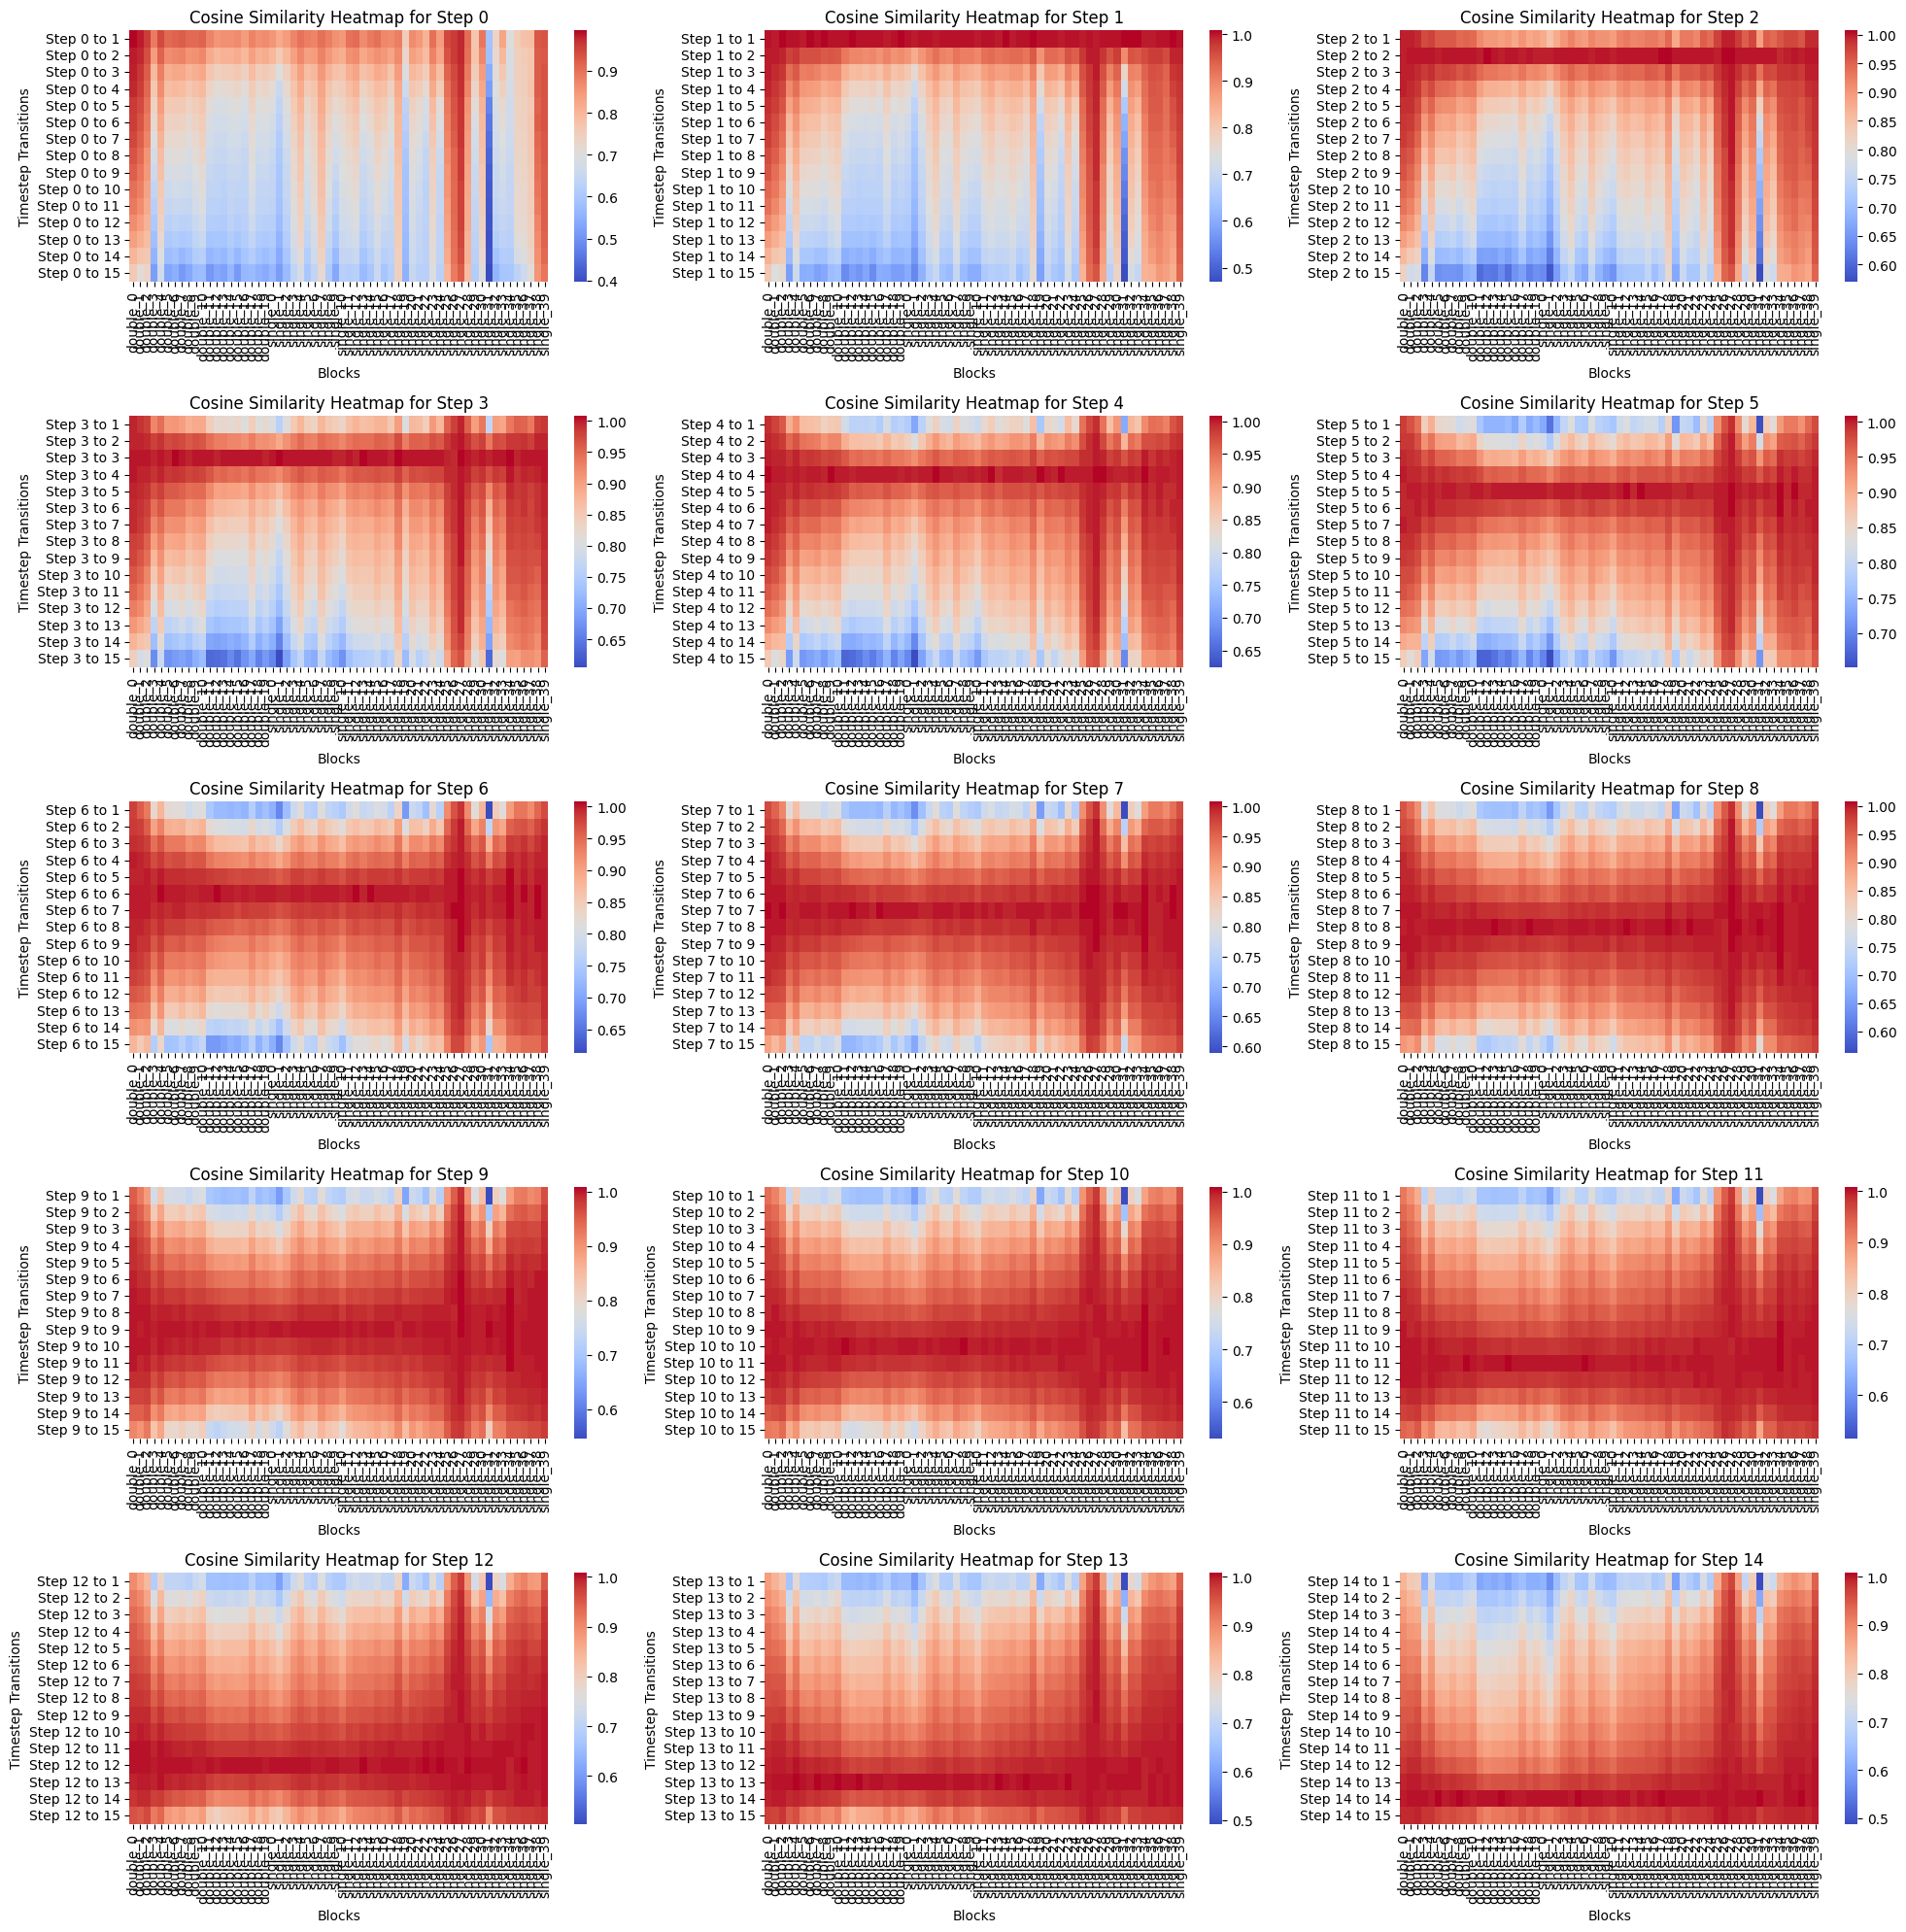

In [20]:
def plot_full_similarity_heatmap(step, ax):
    num_steps = len(all_k_caches)
    num_blocks = len(block_keys)
    
    # Initialize a 2D array to hold similarity values
    full_heatmap_data = np.zeros((num_steps - 1, num_blocks))
    
    for i in range(num_steps - 1):
        for j, key in enumerate(block_keys):
            k_tensor_t = all_k_caches[step][key]
            k_tensor_t_plus_1 = all_k_caches[i + 1][key]

            k_tensor_t_flat = k_tensor_t.flatten()
            k_tensor_t_plus_1_flat = k_tensor_t_plus_1.flatten()

            similarity = F.cosine_similarity(
                k_tensor_t_flat.unsqueeze(0), 
                k_tensor_t_plus_1_flat.unsqueeze(0)
            )
            full_heatmap_data[i, j] = similarity.item()
    
    sns.heatmap(
        full_heatmap_data,
        xticklabels=block_keys,
        yticklabels=[f"Step {step} to {i+1}" for i in range(num_steps - 1)],
        cmap="coolwarm",
        cbar=True,
        ax=ax
    )
    ax.set_title(f"Cosine Similarity Heatmap for Step {step}")
    ax.set_xlabel("Blocks")
    ax.set_ylabel("Timestep Transitions")


# ---- Subplot construction ----
num_steps = len(all_k_caches) - 1
cols = 3
rows = int(np.ceil(num_steps / cols))

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.flatten()

for step in range(num_steps):
    plot_full_similarity_heatmap(step, axes[step])

# Remove unused axes if any
for ax in axes[num_steps:]:
    ax.remove()

plt.tight_layout()
plt.show()
